In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/churn.csv')

In [3]:
df.head()

,account_length,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,128,25,45.07,16.78,11.01,2.70,1,0
1,107,26,27.47,16.62,11.45,3.70,1,0
2,137,0,41.38,10.30,7.32,3.29,0,0
3,84,0,50.90,5.26,8.86,1.78,2,0
4,75,0,28.34,12.61,8.41,2.73,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   number_vmail_messages          5000 non-null   int64  
 2   total_day_charge               5000 non-null   float64
 3   total_eve_charge               5000 non-null   float64
 4   total_night_charge             5000 non-null   float64
 5   total_intl_charge              5000 non-null   float64
 6   number_customer_service_calls  5000 non-null   int64  
 7   churn                          5000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 312.6 KB


In [6]:
df.describe()
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

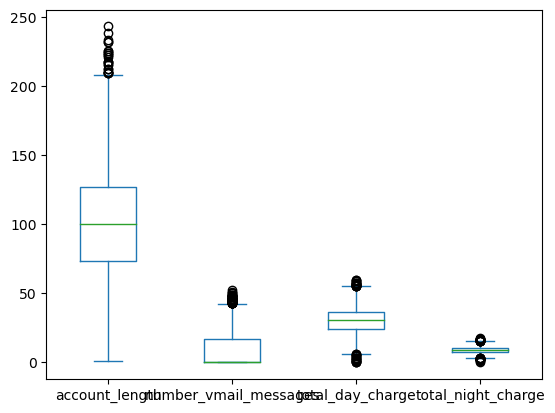

In [8]:
df[['account_length','number_vmail_messages','total_day_charge','total_night_charge']].plot(kind='box')

<Axes: >

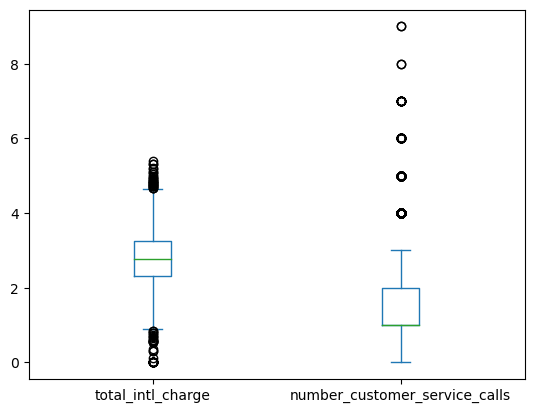

In [10]:
df[['total_intl_charge','number_customer_service_calls']].plot(kind='box')

In [12]:
q1,q3=df['account_length'].quantile([0.25,0.75])

In [13]:
iqr=q3-q1

In [14]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [16]:
indices=df[(df['account_length']<lower_limit) | (df['account_length']>upper_limit)].index

In [20]:
df=df.drop(indices,axis=0)

In [22]:
df.isnull().values.any()

False

In [23]:
duplicates=df[df.duplicated()]

In [25]:
len(duplicates)

0

In [26]:
df.shape

(4976, 8)

In [27]:
x=df.drop('churn',axis=1)
y=df['churn']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [32]:
lda=LinearDiscriminantAnalysis()

In [33]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [34]:
y_pred=lda.predict(x_test)

In [36]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8499665103817816

In [38]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[1258,    9],
       [ 215,   11]], dtype=int64)

In [39]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92      1267\n           1       0.55      0.05      0.09       226\n\n    accuracy                           0.85      1493\n   macro avg       0.70      0.52      0.50      1493\nweighted avg       0.81      0.85      0.79      1493\n'